In [2]:
!pip install opendatasets
!pip install pandas

In [3]:
import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset?select=Books.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adnamard
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset


100%|██████████| 24.3M/24.3M [00:00<00:00, 115MB/s] 


# **Read Dataset**

In [4]:
bookdf = pd.read_csv('book-recommendation-dataset/Books.csv')

<ipython-input-4-fee834cedb7f>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bookdf = pd.read_csv('book-recommendation-dataset/Books.csv')


In [5]:
ratingdf = pd.read_csv('book-recommendation-dataset/Ratings.csv')

In [6]:
userdf = pd.read_csv('book-recommendation-dataset/Users.csv')

In [7]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# **Data Preprocessing**
**We'll check is there any missing value, duplicated, overfitting etc**

# **A. Missing Value**

In [10]:
bookdf.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
ratingdf.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
userdf.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

# **B. Duplicated Data**

In [13]:
bookdf.duplicated().sum()

0

In [14]:
ratingdf.duplicated().sum()

0

In [15]:
userdf.duplicated().sum()

0

# **Innacurate Data Types**

In [16]:
bookdf.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [17]:
ratingdf.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [18]:
userdf.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

# **Action Preprocessing/Handling**
After we checked them, now we'll do some action to tackle each by each.

**A. Missing Value Handling**

In [19]:
# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
128890  193169656X                                        Tyrant Moon   
129037  1931696993                                    Finders Keepers   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
118033              NaN                1999   
128890  Elaine Corvidae                2002   
129037  Linnea Sinclair                2001   
187689              NaN                1995   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

            

1. Book-Author

In [20]:
#Book1
# Specify the row index and column name
row_index = 118033
col_name = 'Book-Author'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: Unknown
ISBN                                                          0751352497
Book-Title                                      A+ Quiz Masters:01 Earth
Book-Author                                                      Unknown
Year-Of-Publication                                                 1999
Publisher                                             Dorling Kindersley
Image-URL-S            http://images.amazon.com/images/P/0751352497.0...
Image-URL-M            http://images.amazon.com/images/P/0751352497.0...
Image-URL-L            http://images.amazon.com/images/P/0751352497.0...
Name: 118033, dtype: object


In [21]:
#Book2
# Specify the row index and column name
row_index = 187689
col_name = 'Book-Author'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: Unknown
ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                                      Unknown
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object


In [22]:
# Specify the row index for which you want to change the publisher
row_index = 129037

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: 	Scribner
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                     \tScribner
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object


In [24]:
# Specify the row index for which you want to change the publisher
row_index = 209538

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: Scribner
ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                       Scribner
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object


In [25]:
#RECHECK

# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
128890  193169656X                                        Tyrant Moon   
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

            Book-Author Year-Of-Publication  \
128890  Elaine Corvidae                2002   
209538             2000   DK Publishing Inc   
220731             2003           Gallimard   
221678             2000   DK Publishing Inc   

                                                Publisher  \
128890                                                NaN   
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
12889

2. Publisher

In [26]:
# Specify the row index for which you want to change the publisher
row_index = 128890

# Prompt the user to input the new publisher
new_publisher = input("Enter the new publisher: ")

# Change the publisher for the specified row
bookdf.at[row_index, 'Publisher'] = new_publisher

# Check if the publisher has been changed
print(bookdf.loc[row_index])


Enter the new publisher: NovelBooks
ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                     NovelBooks
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object


In [41]:
#RECHECK

# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

              Book-Author Year-Of-Publication  \
209538  James Buckley Jr.                2000   
220731          Gallimard                2000   
221678  James Buckley Jr.   DK Publishing Inc   

                                                Publisher  \
209538                                  DK Publishing Inc   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0..

In [38]:
#Book1
# Specify the row index and column name
row_index = 221678
col_name = 'Book-Author'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: James Buckley Jr.
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                            James Buckley Jr.
Year-Of-Publication                                    DK Publishing Inc
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object


In [42]:
#Book1
# Specify the row index and column name
row_index = 221678

col_name = 'Year-Of-Publication'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: 2000
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                            James Buckley Jr.
Year-Of-Publication                                                 2000
Publisher              http://images.amazon.com/images/P/0789466953.0...
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object


In [43]:
#Book1
# Specify the row index and column name
row_index = 221678
col_name = 'Publisher'

# Prompt the user to input the replacement author
replacement_author = input("Enter the replacement author: ")

# Replace the missing value with the replacement author
bookdf.at[row_index, col_name] = replacement_author

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement author: DK Publishing Inc
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                            James Buckley Jr.
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object


In [44]:
#RECHECK

# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
              ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

              Book-Author Year-Of-Publication  \
209538  James Buckley Jr.                2000   
220731          Gallimard                2000   
221678  James Buckley Jr.                2000   

                                                Publisher  \
209538                                  DK Publishing Inc   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678                                  DK Publishing Inc   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
220731  http://images.amazon.com/images/P/2070426769.0...   
221678  http://images.amazon.com/images/P/0789466953.0..

**Fill missing value in Userdf**

In [45]:
# Filter rows with missing age values
missing_age_rows = userdf[userdf['Age'].isna()]

# Display the filtered rows
print(missing_age_rows)


        User-ID                            Location  Age
0             1                  nyc, new york, usa  NaN
2             3     moscow, yukon territory, russia  NaN
4             5  farnborough, hants, united kingdom  NaN
6             7                 washington, dc, usa  NaN
7             8            timmins, ontario, canada  NaN
...         ...                                 ...  ...
278849   278850          sergnano, lombardia, italy  NaN
278853   278854               portland, oregon, usa  NaN
278855   278856           brampton, ontario, canada  NaN
278856   278857           knoxville, tennessee, usa  NaN
278857   278858                dublin, n/a, ireland  NaN

[110762 rows x 3 columns]


Because the missing values are on those age, the important one. So, we'll not drop them, instead we will replace with other numeric

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

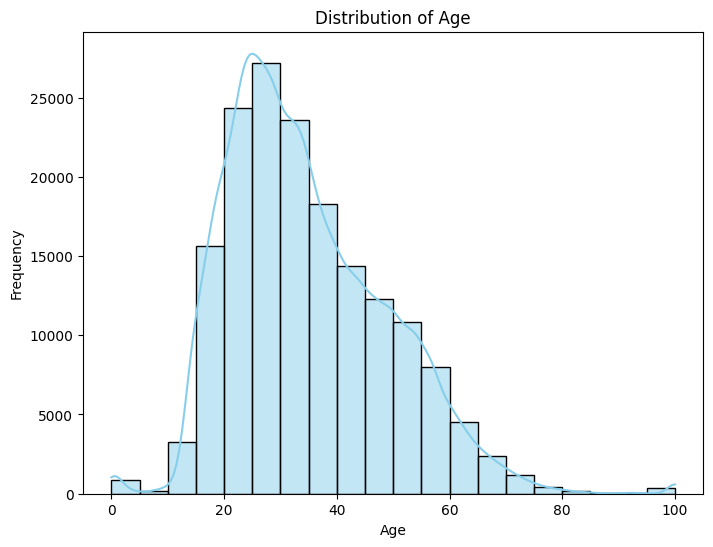

In [47]:
# Filter out missing values before plotting and add range age 0-100
existing_age_values = userdf['Age'].dropna().clip(0, 100)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(existing_age_values, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

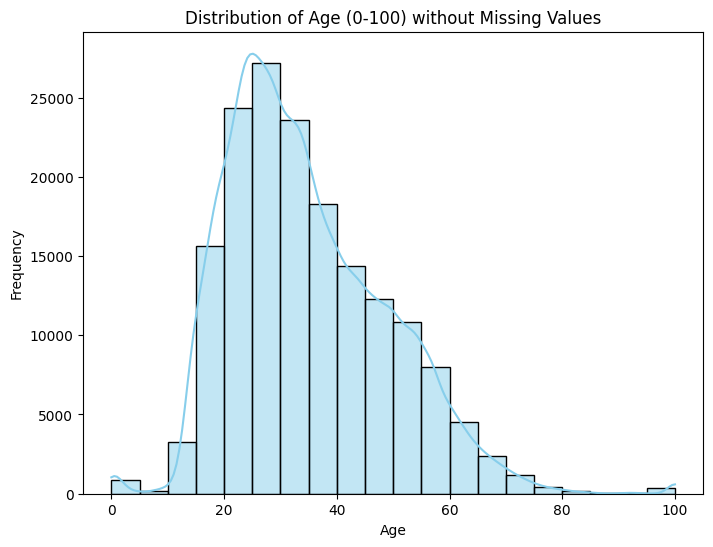

In [48]:
# Filter out missing values
existing_age_values = userdf['Age'].dropna()

# Apply range filter (0 to 100) and create a histogram
existing_age_values_filtered = existing_age_values.clip(0, 100)

# Create a histogram
plt.figure(figsize=(8, 6))
sns.histplot(existing_age_values_filtered, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age (0-100) without Missing Values')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The best option that we have is whether leave it blank or fill it with numerical, since the mean is produce so much bias, we'll fill it with standart deviation

In [49]:
import numpy as np

# Calculate mean and standard deviation of existing age values
mean_age = userdf['Age'].mean()
std_age = userdf['Age'].std()

# Generate random ages from a normal distribution centered around the mean, with standard deviation equal to the standard deviation of age values
random_ages = np.random.normal(loc=mean_age, scale=std_age, size=userdf['Age'].isna().sum())

# Fill missing age values with random ages
userdf.loc[userdf['Age'].isna(), 'Age'] = random_ages

In [50]:
userdf.tail(20)

,User-ID,Location,Age
278838,278839,"austin, texas, usa",37.613684
278839,278840,"encinitas, california, usa",45.000000
278840,278841,"llangollen, denbighshire county, united kingdom.",51.823246
278841,278842,"perth, western australia, australia",28.141797
278842,278843,"pismo beach, california, usa",28.000000
278843,278844,"st. paul, minnesota, usa",28.000000
278844,278845,"järvenpää, uusimaa, finland",25.119776
278845,278846,"toronto, ontario, canada",23.000000
278846,278847,"brooklyn, new york, usa",21.923525
278847,278848,"köln, nordrhein-westfalen, germany",46.361986


Now, we'll change dtypes for easier read

In [51]:
# Convert 'Age' column from float to integer
userdf['Age'] = userdf['Age'].astype(int)

# **D. Image**

In [59]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271358 non-null  object
 8   Image-L              1 non-null       object
dtypes: object(9)
memory usage: 18.6+ MB


In [60]:
bookdf = bookdf.drop('Image-L',axis=1)

In [65]:
# Cek row dimana ada missing value
rows_with_missing = bookdf[bookdf.isna().any(axis=1)]

# Cek col dimana ada missing value
cols_with_missing = bookdf.columns[bookdf.isna().any()].tolist()

# Print rows and columns with missing values
print("Rows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(cols_with_missing)


Rows with missing values:
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []

Columns with missing values:
[]


In [64]:
#Book1
# Specify the row index and column name
row_index = 221678
col_name = 'Image-URL-L'

# Prompt the user to input the replacement author
replacement_image = input("Enter the replacement image: ")

# Replace the missing value with the replacement image
bookdf.at[row_index, col_name] = replacement_image

# Check if the value has been replaced
print(bookdf.loc[row_index])


Enter the replacement image: http://images.amazon.com/images/P/0789466953.0
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                            James Buckley Jr.
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L               http://images.amazon.com/images/P/0789466953.0
Name: 221678, dtype: object


# **D. FORMATTING**

Now, we'll try to format them for train step, by checking is the user_id in both dataset are the same

In [66]:
# Check common User-IDs
common_user_ids = set(ratingdf['User-ID']).intersection(userdf['User-ID'])

# Check if all User-IDs in ratingdf are in userdf
ratings_user_ids = set(ratingdf['User-ID'])
if ratings_user_ids.issubset(common_user_ids):
    print("All User-IDs in ratings.csv exist in users.csv\n")
else:
    print("Some User-IDs in ratings.csv do not exist in users.csv\n")

# Check if all User-IDs in userdf are in ratingdf
users_user_ids = set(userdf['User-ID'])
if users_user_ids.issubset(common_user_ids):
    print("All User-IDs in users.csv exist in ratings.csv")
else:
    print("Some User-IDs in users.csv do not exist in ratings.csv")

All User-IDs in ratings.csv exist in users.csv

Some User-IDs in users.csv do not exist in ratings.csv


Merging age to the user_id

In [67]:
mergeduserdf = pd.merge(ratingdf, userdf[['User-ID', 'Age']], on='User-ID', how='left')

In [68]:
mergeduserdf.tail(20)

,User-ID,ISBN,Book-Rating,Age
1149760,276704,0312873115,0,29
1149761,276704,0345386108,6,29
1149762,276704,0380796155,5,29
1149763,276704,0395404258,0,29
1149764,276704,0425060772,0,29
1149765,276704,0440206529,0,29
1149766,276704,0441007813,0,29
1149767,276704,0446353957,0,29
1149768,276704,0446605409,0,29
1149769,276704,059032120X,0,29


# **C. Adjusting**

In [69]:
#Rename
bookdf = bookdf.rename(columns={'Book-Title': 'Tittle',
                                'Book-Author': 'Author',
                                'Image-URL-S':'Image-S',
                                'Image-URL-M':'Image-M',
                                'Image-URL-L': 'Image-L'})

In [70]:
#Rename
mergeduserdf = mergeduserdf.rename(columns={'Book-Rating': 'Rating'})

In [71]:
mergeduserdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   Rating   1149780 non-null  int64 
 3   Age      1149780 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 35.1+ MB


In [72]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Tittle               271360 non-null  object
 2   Author               271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-S              271360 non-null  object
 6   Image-M              271360 non-null  object
 7   Image-L              271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


# **We're alright, now we're saving them into csv**

In [73]:
bookdf.to_csv('bookcleaned.csv', index=False)

In [74]:
mergeduserdf.to_csv('usercleaned.csv', index=False)